In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math
import scipy
from scipy.signal import peak_widths

genkt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec_qq_kt.root")

Text(0.0, 1.0, 'FCC-ee simulation')

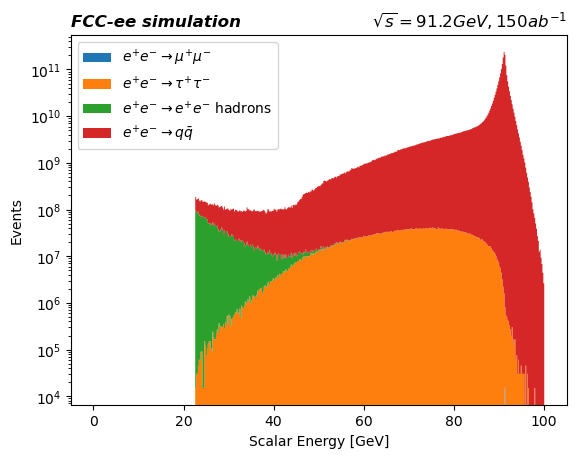

In [2]:
e = genkt["kkmc_ee_uu_ecm91p2/sum_energy"].to_hist()+ genkt["kkmc_ee_dd_ecm91p2/sum_energy"].to_hist()+genkt["kkmc_ee_cc_ecm91p2/sum_energy"].to_hist() +genkt["kkmc_ee_ss_ecm91p2/sum_energy"].to_hist() + genkt["kkmc_ee_bb_ecm91p2/sum_energy"].to_hist()
en = genkt ["wzp6_ee_qq_ecm91p2/sum_energy"].to_hist()
mu_e = genkt['wzp6_ee_mumu_ecm91p2/sum_energy;1'].to_hist()
tau_e = genkt['wzp6_ee_tautau_ecm91p2/sum_energy;1'].to_hist()
gaga_e = genkt['wzp6_gaga_qq_5_ecm91p2/sum_energy;1'].to_hist()

hep.histplot([mu_e,tau_e, gaga_e,e], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill")
plt.yscale("log")
#plt.xlim(27,100)
plt.xlabel("Scalar Energy [GeV]")
plt.legend(loc = "upper left")
#plt.text(62,4000000000, "Filters: # of Jets > 2")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/sum_e_filter.png")

Text(0.0, 1.0, 'FCC-ee simulation')

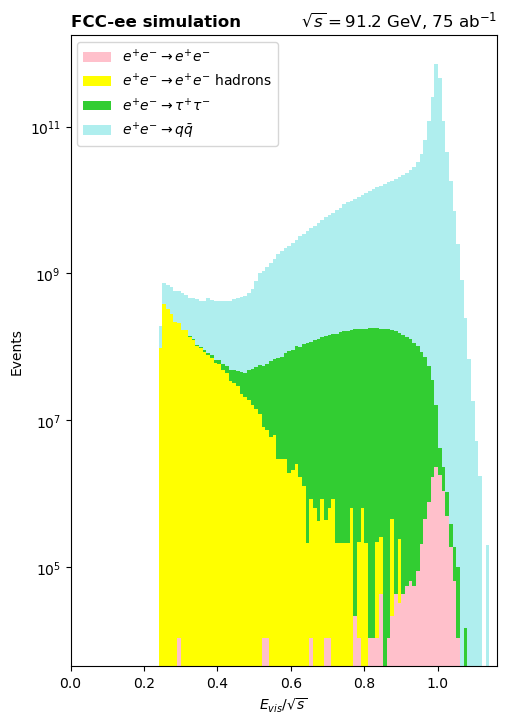

In [3]:
e = genkt['wzp6_ee_qq_ecm91p2/norm_energy;1'].to_hist()
en = genkt["kkmc_ee_uu_ecm91p2/norm_energy"].to_hist()+ genkt["kkmc_ee_dd_ecm91p2/norm_energy"].to_hist()+genkt["kkmc_ee_cc_ecm91p2/norm_energy"].to_hist() +genkt["kkmc_ee_ss_ecm91p2/norm_energy"].to_hist() + genkt["kkmc_ee_bb_ecm91p2/norm_energy"].to_hist()
tau_e = genkt['wzp6_ee_tautau_ecm91p2/norm_energy;1'].to_hist()
mu_e = genkt['wzp6_ee_mumu_ecm91p2/norm_energy;1'].to_hist()
e_e = genkt["p8_ee_Zee_ecm91/norm_energy"].to_hist()
gaga_e = genkt['wzp6_gaga_qq_5_ecm91p2/norm_energy;1'].to_hist()

plt.figure(figsize=(5.5,8.2))
hep.histplot([e_e,gaga_e, tau_e, en], label = [r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$", r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill", color = ["pink","yellow","limegreen", "paleturquoise"])
plt.yscale("log")
plt.xlim(0,1.16)
plt.xlabel(r"$E_{vis}/\sqrt{s}$")
plt.legend(loc = "upper left")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("opt_norm_e.png")

Text(0.0, 1.0, 'FCC-ee simulation')

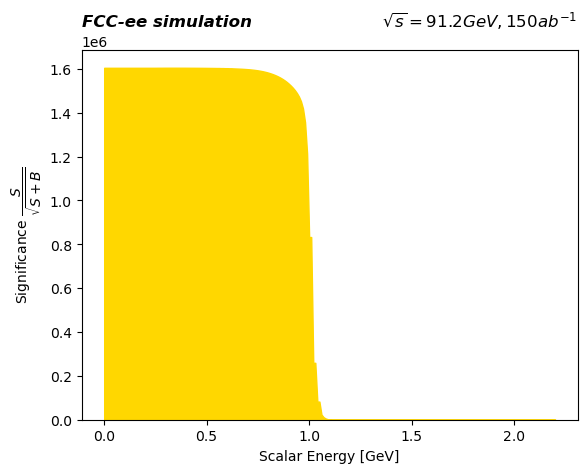

In [4]:
e_y, e_x = e.to_numpy()
e_ynew = []

for i in e_x:
    s = e[i*1.0j:].sum()
    b = tau_e[i*1.0j:].sum()+mu_e[i*1.0j:].sum()+gaga_e[i*1.0j:].sum()
    if s.value+b.value < 0.00000000000000000000000000000000000000000000000000000001:
        e_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        e_ynew.append(ratio)

plt.stackplot(e_x,e_ynew, color = "gold")
#plt.ylim(2.175e6,2.2005e6)
#plt.xlim(23,75)
plt.xlabel("Scalar Energy [GeV]")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/cut_sum_e_filter.png")

In [5]:
optmize = max(e_ynew)
index = np.argmax(e_ynew)
cut = e_x[index]

print(optmize)
print(cut)

1605555.5959003947
0.32


In [6]:
cuts = (genkt["kkmc_ee_uu_ecm91p2/cutFlow"].to_hist()
    + genkt["kkmc_ee_dd_ecm91p2/cutFlow"].to_hist()
    + genkt["kkmc_ee_cc_ecm91p2/cutFlow"].to_hist() 
    + genkt["kkmc_ee_ss_ecm91p2/cutFlow"].to_hist() 
    + genkt["kkmc_ee_bb_ecm91p2/cutFlow"].to_hist())
cutsn = genkt ["wzp6_ee_qq_ecm91p2/cutFlow"].to_hist()
gaga_cuts = genkt['wzp6_gaga_qq_5_ecm91p2/cutFlow;1'].to_hist()
tau_cuts = genkt['wzp6_ee_tautau_ecm91p2/cutFlow;1'].to_hist()
mu_cuts = genkt['wzp6_ee_mumu_ecm91p2/cutFlow;1'].to_hist()

events0,cuts_x = cuts.to_numpy()
events0n,cuts_xn = cutsn.to_numpy()
gaga_events0,gaga_cuts_x = gaga_cuts.to_numpy()
tau_events0,tau_cuts_x = tau_cuts.to_numpy()
mu_events0,mu_cuts_x = mu_cuts.to_numpy()

print(events0[0], events0[1],events0[2])
print(events0n[0], events0n[1],events0n[2])
print(events0[2]/events0[0])
print(events0n[2]/events0n[0])
print(gaga_events0[2])
print(tau_events0[2])
print(mu_events0[2])
print(cut)

2308624004475.0 2302798320510.7617 2297386407512.078
2587500000000.0 2586892972500.0 2586008565000.0
0.9951323398954792
0.9994236
3024215082.0
6234629289.940828
15179.640718562874
0.32


In [7]:
def acceptance_error(n_sig, n_tot):
    return np.sqrt(n_sig*(1-(n_sig/n_tot)))/n_tot
def cross_section(n_sig, n_tot, l):
    a = n_sig/n_tot
    result = n_sig/(a*l)
    return f"Cross Section: {result} ± {cross_section_error(l, n_sig/n_tot, n_tot, n_sig)}"
def cross_section_error(luminosity, acceptance, n_tot, n_sig):
    part_1 = ((1/(luminosity*acceptance))**2)*(n_sig+2*(n_tot-n_sig))
    part_2 = ((n_sig)/(luminosity*acceptance**2))**2*(acceptance_error(n_sig, n_tot))**2
    part_3 = (n_sig)/(luminosity**2*acceptance)*(10e-4)**2
    return np.sqrt(part_1 + part_2 + part_3)

def results(n_sig,n0,n_bac,lumi):
    a = n_sig/n0
    acceptance_error = np.sqrt(n_sig*(1-(n_sig/n0)))/n0
    x_sec = n_sig/(lumi*a)
    part_1 = ((1/(lumi*a))**2)*(n_sig+n_bac)
    part_2 = ((n_sig)/(lumi*a**2))**2*(acceptance_error)**2
    part_3 = (n_sig)/(lumi**2*a)*(1e-8)
    x_sec_error = math.sqrt(part_1 + part_2 + part_3)
    result = [a, acceptance_error, x_sec, x_sec_error]
    return result

print(cut)

0.32


In [8]:
result = results(events0n[2],events0n[0],gaga_events0[2]+tau_events0[2]+mu_events0[2],75000000)
print(result)
print(cut)

[0.9994236, 1.492095453604357e-08, 34500.0, 0.021498337542313402]
0.32


In [9]:
# events = e[22.6j:].sum().value
# gaga_events = gaga_e[22.61j:].sum().value
# tau_events = tau_e[22.6j:].sum().value
# mu_events = mu_e[22.6j:].sum().value
# sig = events/np.sqrt(events+tau_events+mu_events+gaga_events)

# print(events)
# print(gaga_events)
# print(tau_events)
# print(mu_events)
# print(sig)
# print(cut)

Text(0.0, 1.0, 'FCC-ee simulation')

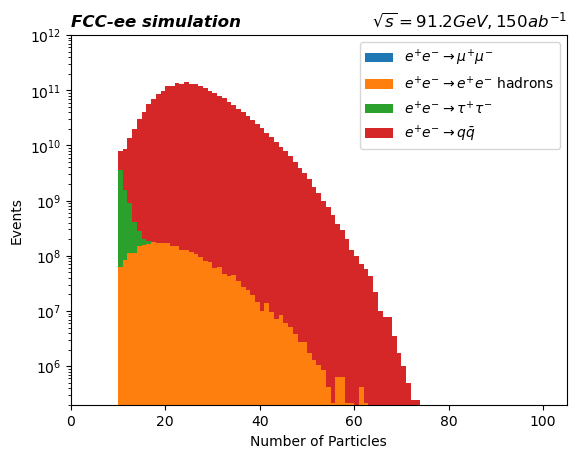

In [10]:
no = genkt["kkmc_ee_uu_ecm91p2/RP_no"].to_hist()+ genkt["kkmc_ee_dd_ecm91p2/RP_no"].to_hist()+genkt["kkmc_ee_cc_ecm91p2/RP_no"].to_hist() +genkt["kkmc_ee_ss_ecm91p2/RP_no"].to_hist() + genkt["kkmc_ee_bb_ecm91p2/RP_no"].to_hist()
non = genkt ["wzp6_ee_qq_ecm91p2/RP_no"].to_hist()
mu_no = genkt['wzp6_ee_mumu_ecm91p2/RP_no;1'].to_hist()
tau_no = genkt['wzp6_ee_tautau_ecm91p2/RP_no;1'].to_hist()
gaga_no = genkt['wzp6_gaga_qq_5_ecm91p2/RP_no;1'].to_hist()

hep.histplot([mu_no, gaga_no, tau_no, no], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons", r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill")
plt.yscale("log")
plt.xlim(0,105)
plt.ylim(2e5,1e12)
plt.xlabel("Number of Particles")
plt.legend(loc = "upper right")
#plt.text(85,4000000000, "Filters: # of Jets > 2")
#plt.text(88,2000000000, "Scalar Energy >= 61.2")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("l3_cos_smaller_0_74.png")

Text(0.0, 1.0, 'FCC-ee simulation')

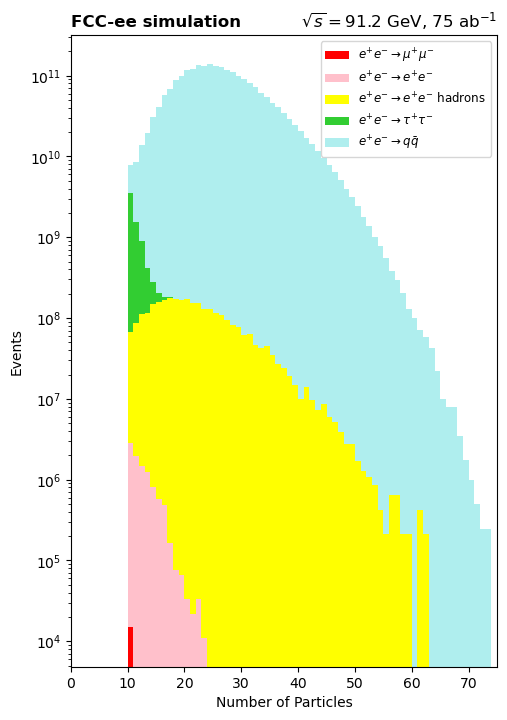

In [11]:
no = genkt['wzp6_ee_qq_ecm91p2/RP_no;1'].to_hist()
non = genkt["kkmc_ee_uu_ecm91p2/RP_no"].to_hist()+ genkt["kkmc_ee_dd_ecm91p2/RP_no"].to_hist()+genkt["kkmc_ee_cc_ecm91p2/RP_no"].to_hist() +genkt["kkmc_ee_ss_ecm91p2/RP_no"].to_hist() + genkt["kkmc_ee_bb_ecm91p2/RP_no"].to_hist()
mu_no = genkt['wzp6_ee_mumu_ecm91p2/RP_no;1'].to_hist()
e_no = genkt["p8_ee_Zee_ecm91/RP_no"].to_hist()
tau_no = genkt['wzp6_ee_tautau_ecm91p2/RP_no;1'].to_hist()
gaga_no = genkt['wzp6_gaga_qq_5_ecm91p2/RP_no;1'].to_hist()

plt.figure(figsize=(5.5,8.2))
hep.histplot([mu_no,e_no,gaga_no, tau_no, non], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$",
                    r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons", r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill", color = ["red","pink","yellow", "limegreen", "paleturquoise"])
plt.yscale("log")
plt.xlim(0,75)
plt.xlabel("Number of Particles")
plt.legend(loc = "upper right", fontsize = "8.5")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("opt_rpno.png")

Text(0.0, 1.0, 'FCC-ee simulation')

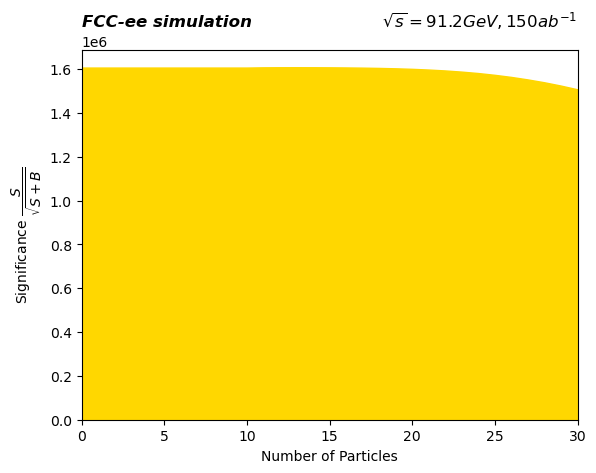

In [12]:
no_y , no_x = no.to_numpy()


no_ynew = []

for i in no_x:
    s = no[i*1.0j:].sum()
    b = tau_no[i*1.0j:].sum()+mu_no[i*1.0j:].sum()+gaga_no[i*1.0j:].sum()
    if s.value+b.value < 0.0000000001:
        no_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        no_ynew.append(ratio)

plt.stackplot(no_x,no_ynew, color = "gold")
#plt.ylim(2.26e6,2.266e6)
plt.xlim(0,30)
plt.xlabel("Number of Particles")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/cut_RP_no_filtersum_e.png")

In [13]:
optmize = max(no_ynew)
index = np.argmax(no_ynew)
cut = no_x[index]

print(optmize)

print(cut)

1606774.6171215172
13.0


In [14]:
events = no[cut*1j:].sum().value
gaga_events = gaga_no[cut*1j:].sum().value
tau_events = tau_no[cut*1j:].sum().value
mu_events = mu_no[cut*1j:].sum().value
sig = events/np.sqrt(events+tau_events+mu_events+gaga_events)

print(events)
print(gaga_events)
print(tau_events)
print(mu_events)
print(sig)
print(cut)

2584981327500.0
2765039274.0
495726035.50295866
0.0
1606774.6171215172
13.0


(0.0, 100.0)

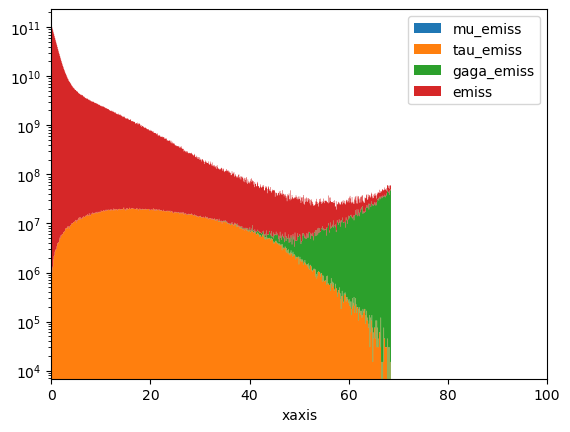

In [15]:
emiss = genkt['wzp6_ee_qq_ecm91p2/missingEnergy;1'].to_hist()
mu_emiss = genkt['wzp6_ee_mumu_ecm91p2/missingEnergy;1'].to_hist()
tau_emiss = genkt['wzp6_ee_tautau_ecm91p2/missingEnergy;1'].to_hist()
gaga_emiss = genkt['wzp6_gaga_qq_5_ecm91p2/missingEnergy;1'].to_hist()

hep.histplot([mu_emiss,tau_emiss,gaga_emiss,emiss], label = ["mu_emiss","tau_emiss","gaga_emiss","emiss"], histtype = "fill", stack = True)
plt.yscale("log")
plt.legend()
plt.xlim(0,100)

Text(0.0, 1.0, 'FCC-ee simulation')

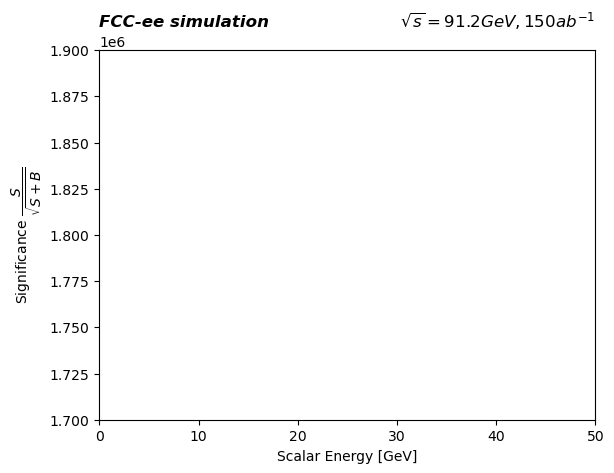

In [16]:
em_y, em_x = emiss.to_numpy()
em_ynew = []

for i in range(1,len(em_x)+1):
    s = emiss[:i].sum()
    b = tau_emiss[:i].sum()+mu_emiss[:i].sum()+gaga_emiss[:i].sum()
    if s.value+b.value < 0.00000000000000000000000000000000000000000000000000000001:
        em_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        em_ynew.append(ratio)

plt.stackplot(em_x,em_ynew, color = "gold")
plt.ylim(1.7e6,1.9e6)
#plt.text(24,2.199e6, "Filters: # of Jets > 2")
plt.xlim(0,50)
plt.xlabel("Scalar Energy [GeV]")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/cut_sum_e_filter.png")

In [17]:
optmize = max(em_ynew)
index = np.argmax(em_ynew)
cut = em_x[index]

print(optmize)
print(cut)

1325584.1390044992
61.199999999999996


In [18]:
events = emiss[:cut*1.0j].sum().value
gaga_events = gaga_emiss[:cut*1.0j].sum().value
tau_events = tau_emiss[:cut*1.0j].sum().value
mu_events = mu_emiss[:cut*1.0j].sum().value

print(events)
print(gaga_events)
print(tau_events)
print(mu_events)

1764414180000.0
1052901720.0
6222407396.449705
0.0


Text(0.0, 1.0, 'FCC-ee simulation')

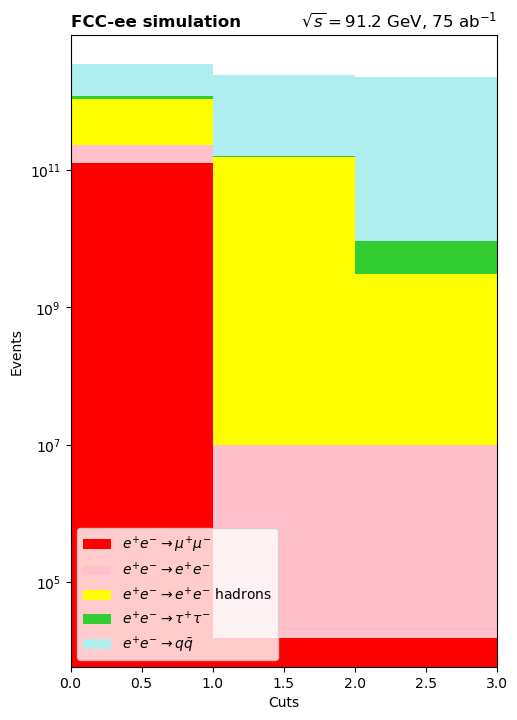

In [19]:
cuts = genkt['wzp6_ee_qq_ecm91p2/cutFlow;1'].to_hist()
cutsn = genkt["kkmc_ee_uu_ecm91p2/cutFlow"].to_hist()+ genkt["kkmc_ee_dd_ecm91p2/cutFlow"].to_hist()+genkt["kkmc_ee_cc_ecm91p2/cutFlow"].to_hist() +genkt["kkmc_ee_ss_ecm91p2/cutFlow"].to_hist() + genkt["kkmc_ee_bb_ecm91p2/cutFlow"].to_hist()
mu_cuts = genkt['wzp6_ee_mumu_ecm91p2/cutFlow;1'].to_hist()
e_cuts = genkt["p8_ee_Zee_ecm91/cutFlow"].to_hist()
tau_cuts = genkt['wzp6_ee_tautau_ecm91p2/cutFlow;1'].to_hist()
gaga_cuts = genkt['wzp6_gaga_qq_5_ecm91p2/cutFlow;1'].to_hist()

plt.figure(figsize=(5.5,8.2))
hep.histplot([mu_cuts,e_cuts, gaga_cuts, tau_cuts, cutsn], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$",
                                                                    r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons",
                                            r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill", color = ["red","pink", "yellow", "limegreen", "paleturquoise"])
plt.yscale("log")
plt.xlim(0,3)
#plt.ylim(1,7e4)
plt.xlabel("Cuts")
plt.legend(loc = "lower left", fontsize = "10")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("opt_cutflow.png")

In [20]:
x, y = cutsn.to_numpy()
mux, muy = mu_cuts.to_numpy()
taux, tauy = tau_cuts.to_numpy()
gagax, gagay = gaga_cuts.to_numpy()
ex, ey = e_cuts.to_numpy()

print(x)
print(mux)
print(taux)
print(gagax)
print(ex)

[2.30862400e+12 2.30279832e+12 2.29738641e+12 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[1.26750000e+11 1.51796407e+04 1.51796407e+04 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[1.27500000e+11 6.23545917e+09 6.23462929e+09 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[8.52552000e+11 1.53693812e+11 3.02421508e+09 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[1.09656750e+11 9.75945075e+06 9.75945075e+06 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [21]:

def acceptance_error(n_sig, n_tot):
    return np.sqrt(n_sig*(1-(n_sig/n_tot)))/n_tot
def cross_section(n_sig, n_tot, l):
    a = n_sig/n_tot
    result = n_sig/(a*l)
    return f"Cross Section: {result} ± {cross_section_error(l, n_sig/n_tot, n_tot, n_sig)}"
def cross_section_error(luminosity, acceptance, n_tot, n_sig):
    part_1 = ((1/(luminosity*acceptance))**2)*(n_sig+2*(n_tot-n_sig))
    part_2 = ((n_sig)/(luminosity*acceptance**2))**2*(acceptance_error(n_sig, n_tot))**2
    part_3 = (n_sig)/(luminosity**2*acceptance)*(10e-4)**2
    return np.sqrt(part_1 + part_2 + part_3)

def results(n_sig,n0,n_bac,lumi):
    a = n_sig/n0
    acceptance_error = np.sqrt(n_sig*(1-(n_sig/n0)))/n0
    x_sec = n_sig/(lumi*a)
    part_1 = ((1/(lumi*a))**2)*(n_sig+n_bac)
    part_2 = ((n_sig)/(lumi*a**2))**2*(acceptance_error)**2
    part_3 = (n_sig)/(lumi**2*a)*(1e-8)
    x_sec_error = math.sqrt(part_1 + part_2 + part_3)
    result = [a, acceptance_error, x_sec, x_sec_error]
    return result

result = results(x[2],x[0],gagax[2]+taux[2]+mux[2]+ex[2],75000000)
print(result)

print(x[2])
print(x[0]/75000000)

[0.9951323398954792, 4.5806165628090915e-08, 30781.653393, 0.020398556259762286]
2297386407512.078
30781.653393


In [23]:
acceptance_error = 2.198096229231093e-05
lumi = 75000000
a = 0.9951323398954792
n_sig = x[2]
n_bac = gagax[2]+taux[2]+mux[2]+ex[2]
part_1 = ((1/(lumi*a))**2)*(n_sig+n_bac)
part_2 = ((n_sig)/(lumi*a**2))**2*(acceptance_error)**2
part_3 = ((n_sig)/(lumi**2*a))**2*(lumi*2e-5)**2
x_sec = n_sig/(lumi*a)
x_sec_error = math.sqrt(part_1 + part_2 + part_3)
result = [a, acceptance_error, x_sec, x_sec_error]
print(result)
print(n_sig+n_bac)
print(math.sqrt(part_1), math.sqrt(part_1)/30781)
print(math.sqrt(part_2), math.sqrt(part_2)/30781)
print(math.sqrt(part_3), math.sqrt(part_3)/30781)
print(x_sec_error/x_sec)

[0.9951323398954792, 2.198096229231093e-05, 30781.653393, 0.9174471916962206]
2306655026514.4097
0.02034928810077184 6.610989929102966e-07
0.6799199818966627 2.2088950388118084e-05
0.61563306786 2.000042454306228e-05
2.9805000400168742e-05
